In [56]:
using DelimitedFiles, PyPlot
ori = readdlm("data.TXT",'\t')
len = size(ori,1)
function g(x)
    if x < 2961
        return (x-2900)*27+1614
    elseif x < 2969
        return 6000
    elseif x < 2992.5
        return (x-2965)*(-50.8)+3000
    elseif x < 3006
        return 38000
    else 
        return 1200
    end
end
    
        

g (generic function with 1 method)

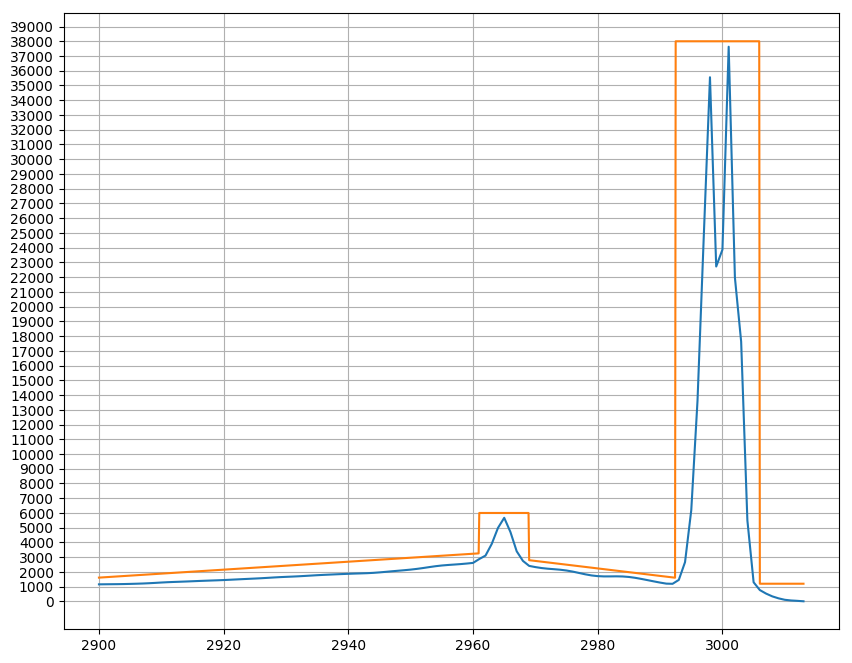

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2dbc9ebfd0>

In [57]:
fig = figure(figsize=[10,8])
grid()
yticks(0:1000:40000)
xi = ori[:,1]
plot(xi,ori[:,2])
xi = 2900:0.1:3013
plot(xi,g.(xi))